Q.4:

In [277]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def delta_signal():
    signal = np.zeros(N)
    signal[9] = 1
    return signal

def constant_signal():
    return np.ones(N) 

def plot_graph(G, v):
    # print("The signal values are:",nx.get_node_attributes(G, 'value'))
    norm = Normalize(vmin=np.min(v), vmax=np.max(v))
    cmap = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm).cmap
    
    plt.figure(figsize=(8, 6))
    nx.set_node_attributes(G, {i: val for i, val in enumerate(v)}, 'value')
    node_values = nx.get_node_attributes(G, 'value').values()
    nx.draw(G, node_color=list(node_values), cmap=cmap, with_labels=True)
    plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), label='Node Value')
    plt.show()

def plot_stem(signal, title):
    plt.figure(figsize=(10, 4))
    plt.stem(range(len(signal)), signal, basefmt=' ', use_line_collection=True)
    plt.title(title)
    plt.xlabel('Node')
    plt.ylabel('Signal Value')
    plt.grid(True)
    plt.show()

def graph_filter1(G):
    A = nx.adjacency_matrix(G).toarray()
    D = np.diag(np.sum(A, axis=1))
    L = D - A
    inv_D = np.linalg.inv(D)
    tau = inv_D@L
    H = np.linalg.inv(np.add(np.identity(A.shape[0]),(10*tau)))
    return H

def graph_filter2(G):
    A = nx.adjacency_matrix(G).toarray()
    D = np.diag(np.sum(A, axis=1))
    L = D - A
    inv_D = np.linalg.inv(D)
    tau = inv_D@L
    H = np.subtract(np.identity(A.shape[0]),0.5*tau)
    return H

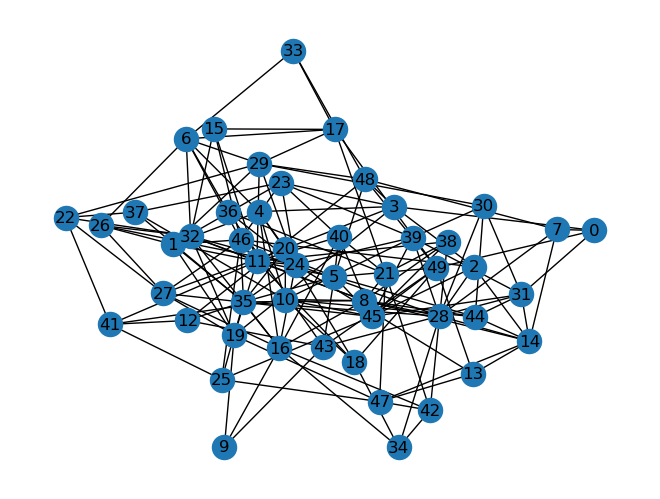

In [278]:
N = 50
p = 0.15
Graph = nx.erdos_renyi_graph(N, p)
G = Graph.copy()
delta = delta_signal()
constant = constant_signal()
nx.draw(G, with_labels=True)

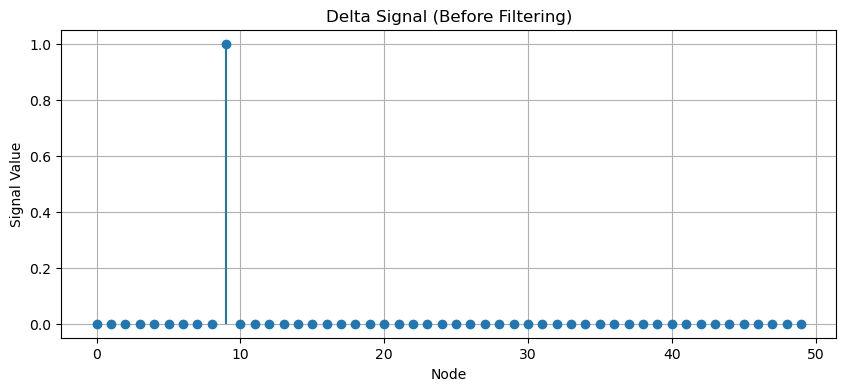

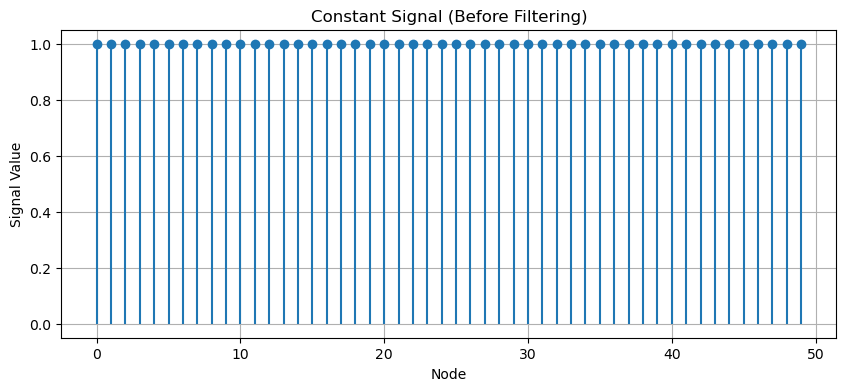

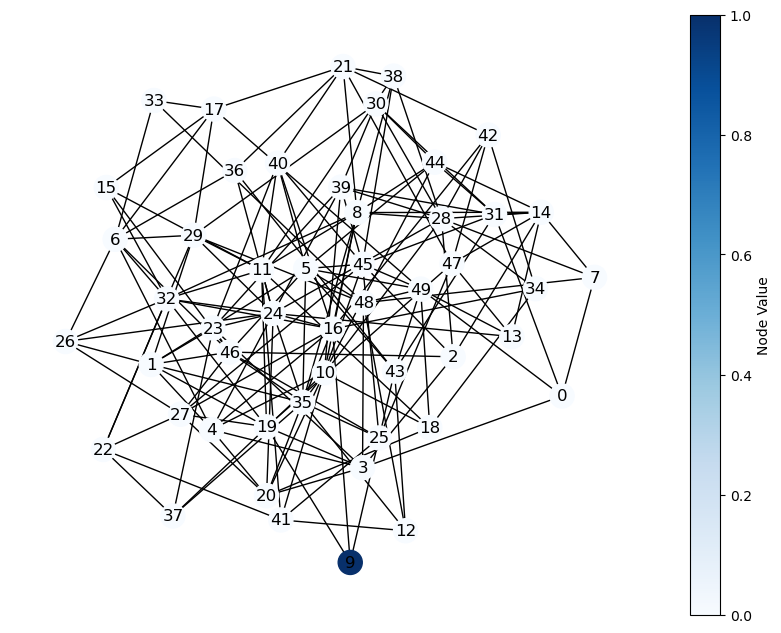

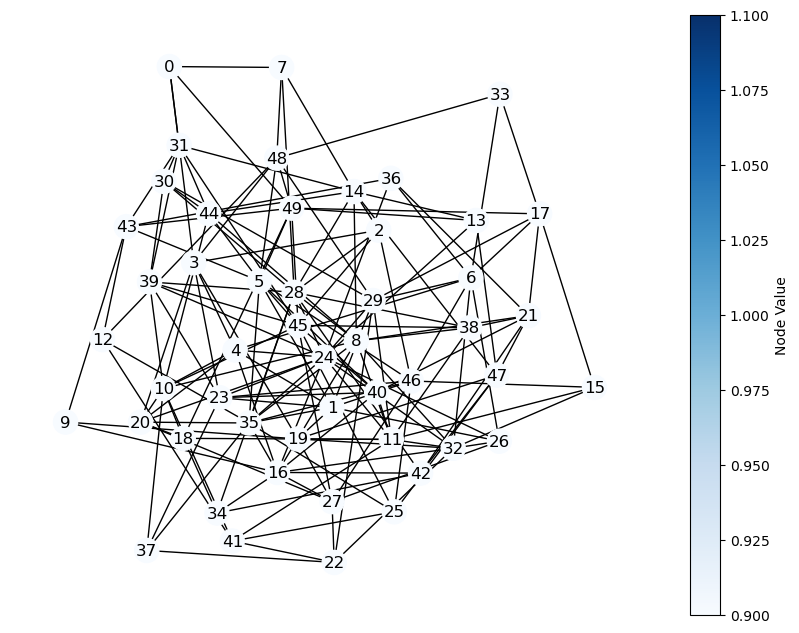

In [279]:
plot_stem(delta, "Delta Signal (Before Filtering)")
plot_stem(constant, "Constant Signal (Before Filtering)")
plot_graph(G, delta)
plot_graph(G, constant)

In [280]:
H1  = graph_filter1(G)
H2  = graph_filter2(G)
print(H1)
print(H2)

[[0.1150967  0.01642549 0.01560642 ... 0.01367946 0.02768455 0.04515975]
 [0.00821274 0.12022619 0.01205386 ... 0.01336271 0.01761059 0.01778946]
 [0.01248514 0.01928617 0.11149975 ... 0.01620322 0.01782085 0.01965573]
 ...
 [0.00911964 0.01781695 0.01350268 ... 0.12081937 0.01440779 0.02060125]
 [0.01581974 0.02012639 0.01272918 ... 0.01234953 0.12394446 0.03625806]
 [0.02257987 0.01778946 0.01228483 ... 0.01545094 0.0317258  0.12426774]]
[[0.5        0.         0.         ... 0.         0.         0.125     ]
 [0.         0.5        0.         ... 0.         0.         0.        ]
 [0.         0.         0.5        ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.5        0.         0.        ]
 [0.         0.         0.         ... 0.         0.5        0.07142857]
 [0.0625     0.         0.         ... 0.         0.0625     0.5       ]]


C:\Users\Yaniv\AppData\Local\Temp\ipykernel_2312\3791164695.py:35: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()
C:\Users\Yaniv\AppData\Local\Temp\ipykernel_2312\3791164695.py:44: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()


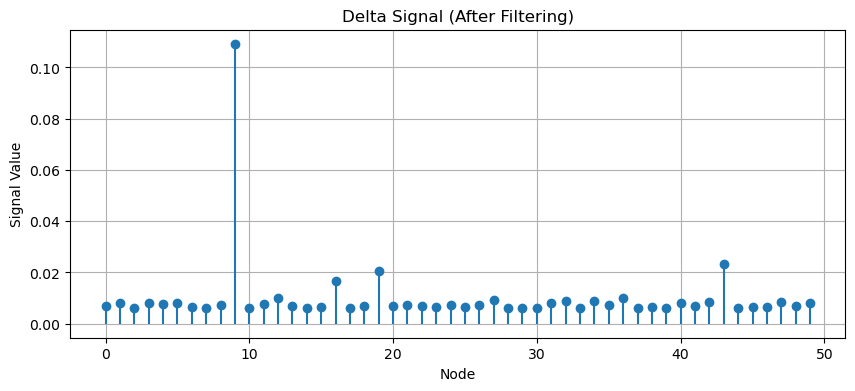

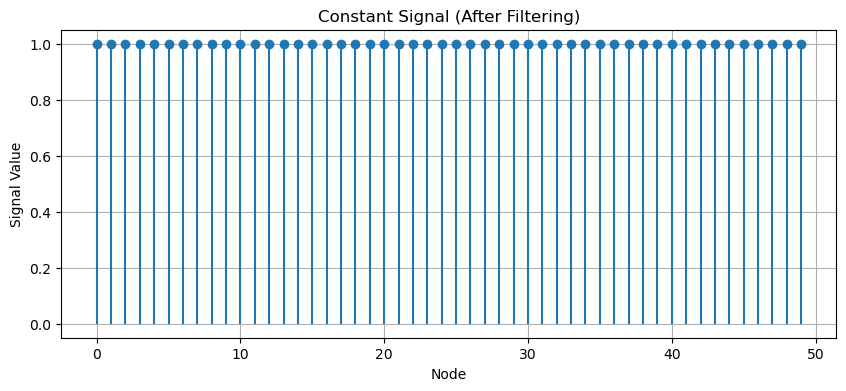

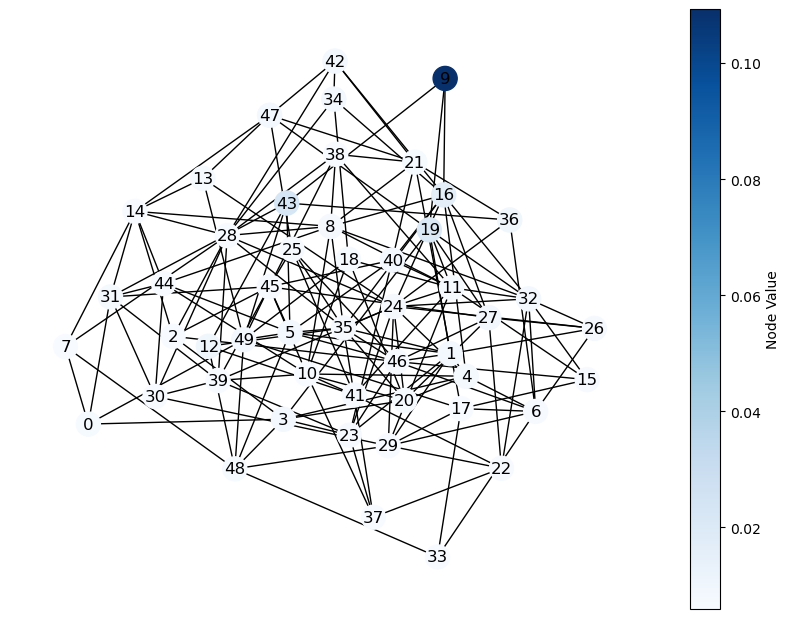

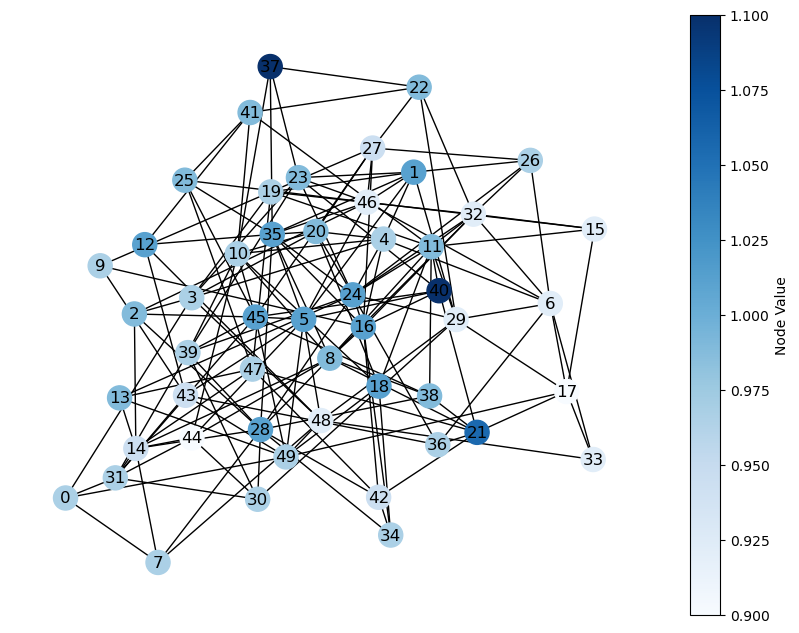

In [281]:
filtered_delta1 = H1@delta
filtered_constant1 = H1@constant
plot_stem(filtered_delta1, "Delta Signal (After Filtering)")
plot_stem(filtered_constant1, "Constant Signal (After Filtering)")
plot_graph(G, filtered_delta1)
plot_graph(G, filtered_constant1)

In [282]:
A = nx.adjacency_matrix(G).toarray()
vector = A[9,:]
indices = [i for i, value in enumerate(vector) if value == 1]
print(indices)

[16, 19, 43]


C:\Users\Yaniv\AppData\Local\Temp\ipykernel_2312\1301445671.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()


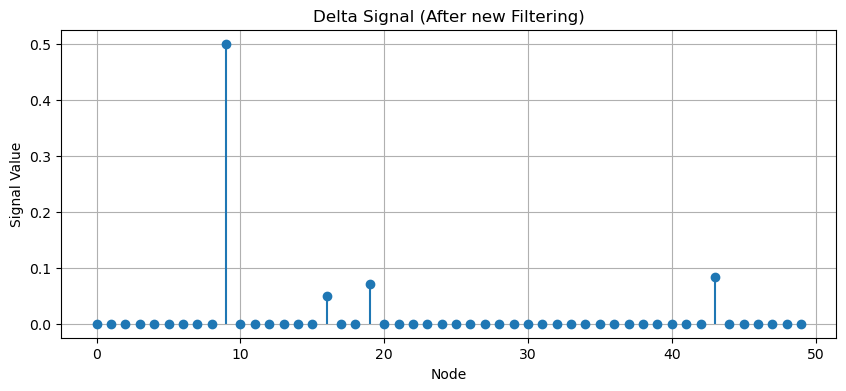

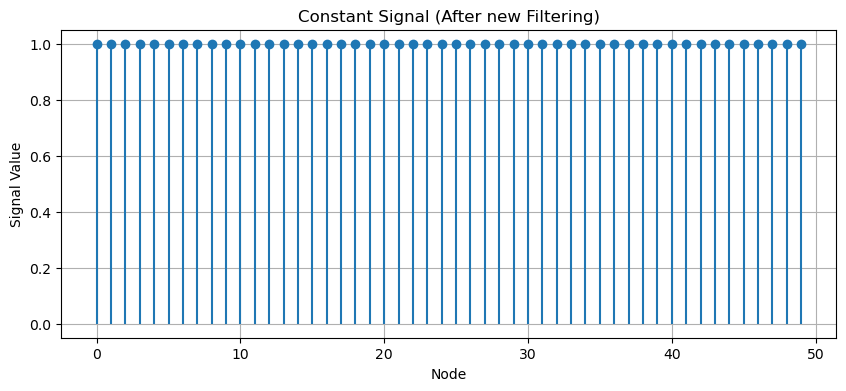

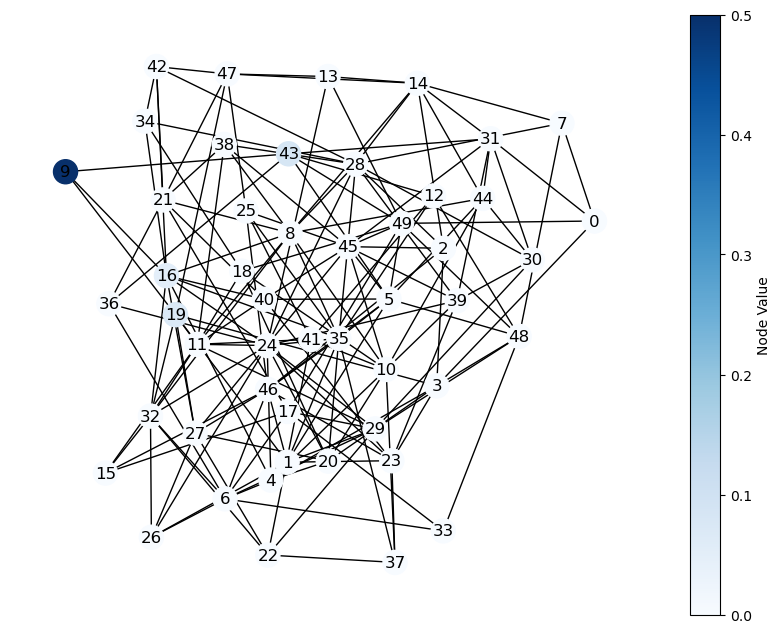

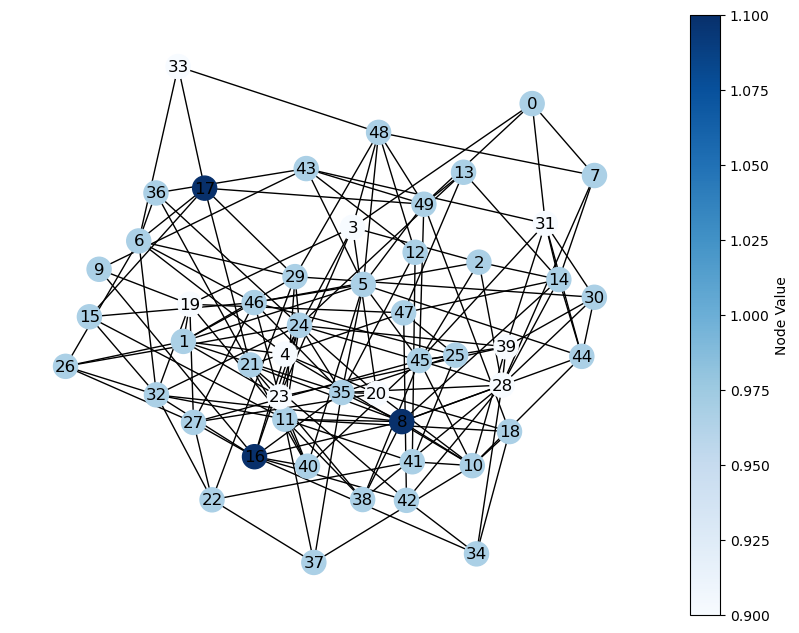

In [283]:
filtered_delta2 = H2@delta
filtered_constant2 = H2@constant
plot_stem(filtered_delta2, "Delta Signal (After new Filtering)")
plot_stem(filtered_constant2, "Constant Signal (After new Filtering)")
plot_graph(G, filtered_delta2)
plot_graph(G, filtered_constant2)